In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
data = pd.read_excel(r'C:\Users\Abin\Project Pro\1. Flight ticket price predictor\Datasets\Data_Train.xlsx')

In [76]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [78]:
data.shape

(10683, 11)

In [79]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [80]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [81]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [82]:
data.isna().sum()     #data.isnull()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [83]:
data[data['Route'].isna() | data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [84]:
data.dropna(inplace = True)

In [85]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [86]:
data.count()

Airline            10682
Date_of_Journey    10682
Source             10682
Destination        10682
Route              10682
Dep_Time           10682
Arrival_Time       10682
Duration           10682
Total_Stops        10682
Additional_Info    10682
Price              10682
dtype: int64

# Exploratory Data Analysis & Feature engineering:
## 1. Duration
## 2. Departure and Arrival time
## 3. Date of journey
## 4. Total stops
## 5. Additional info
## 6. Airline
## 7. Source and destination
## 8. Route

## DURATION

In [87]:
# converting duration into minutes
def convert_duration(duration):
    if len(duration.split()) == 2:
        hours = int(duration.split()[0][:-1])
        minutes = int(duration.split()[1][:-1])
        return hours * 60 + minutes
    else:
        return int(duration[:-1]) * 60

In [88]:
data["Duration"] = data["Duration"].apply(convert_duration)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


## DEPARTURE AND ARRIVAL TIME

In [89]:
##converting Dep_Time and Arrival_Time to datetime format

data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
data.dtypes

Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                    int64
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [90]:
#extracting hours and minutes from the departure and arrival times
data['Dep_time_hr']=data['Dep_Time'].dt.hour
data['Dep_time_minute']=data['Dep_Time'].dt.minute
data['Arr_time_hr']=data['Arrival_Time'].dt.hour
data['Arr_time_minute']=data['Arrival_Time'].dt.minute

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2022-12-24 22:20:00,2022-03-22 01:10:00,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-24 05:50:00,2022-12-24 13:15:00,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2022-12-24 09:25:00,2022-06-10 04:25:00,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2022-12-24 18:05:00,2022-12-24 23:30:00,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2022-12-24 16:50:00,2022-12-24 21:35:00,285,1 stop,No info,13302,16,50,21,35


In [91]:
data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


## DATE OF JOURNEY

In [92]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data.head()

C:\Users\Abin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Abin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Abin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Abin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify in

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


In [93]:
data['Date_of_Journey'].dt.year.unique()

array([2019], dtype=int64)

In [94]:
#extracting the month and day from the Date of Journey column
data['day_of_journey']=data['Date_of_Journey'].dt.day
data['month_of_journey']=data['Date_of_Journey'].dt.month

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,day_of_journey,month_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,3,1


In [95]:
#dropping the date_of_journey column
data.drop('Date_of_Journey',axis=1,inplace=True)

data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,day_of_journey,month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,3,1


## TOTAL STOPS

In [96]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [97]:
# mapping non-stop to 0, 1 stop to 1, 2 stops to 2, 3 stops to 3, and 4 stops to 4
data['Total_Stops']=data['Total_Stops'].map(
    {'non-stop':0,
     '1 stop':1,
     '2 stops':2,
     '3 stops':3,
     '4 stops':4})

In [98]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,day_of_journey,month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,50,13,15,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,25,4,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,18,5,23,30,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,16,50,21,35,3,1


## ADDITIONAL INFO

In [99]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

#### since majority of the values have no info, we might as well discard this column as it doesn't seem to have provided any valueable information.

In [100]:
data.drop('Additional_Info', axis = 1, inplace = True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,day_of_journey,month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,3,1


In [101]:
#### The remaining data types are of object data type
data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

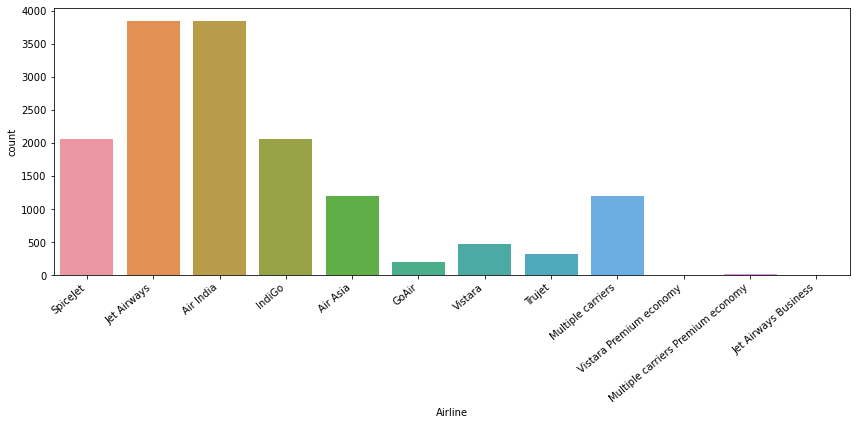

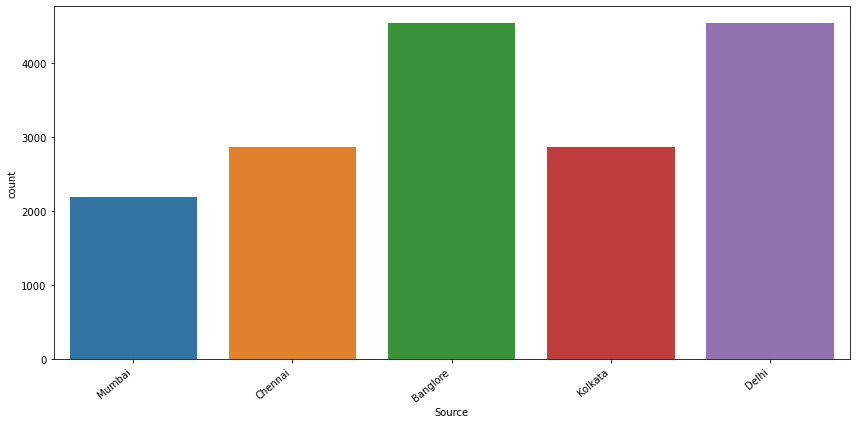

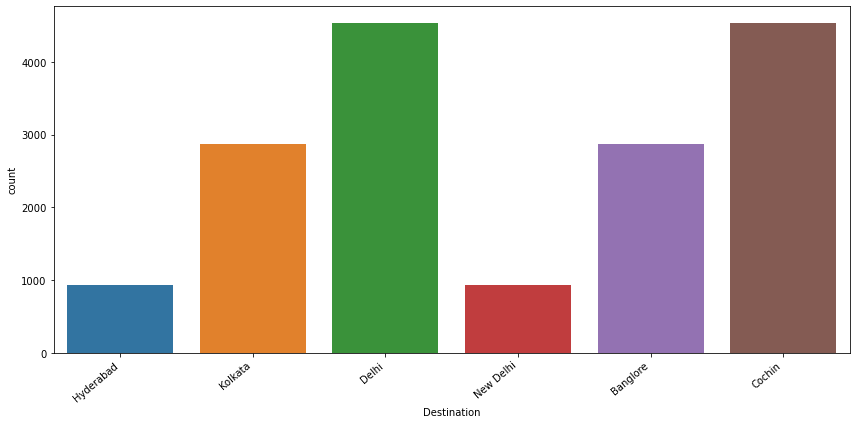

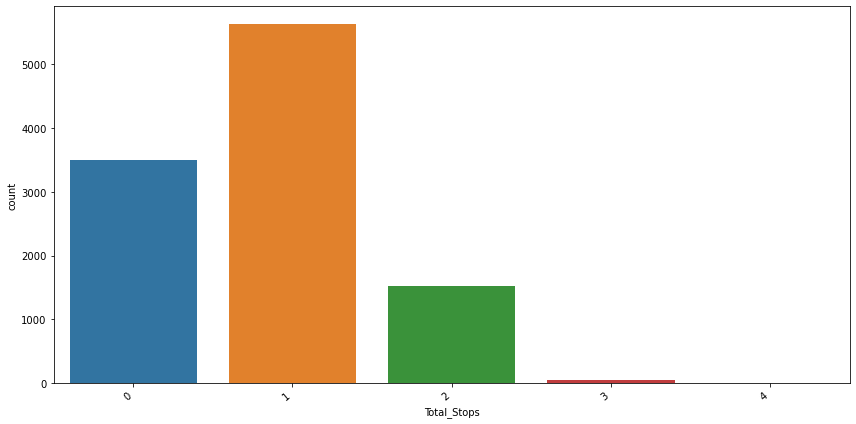

In [103]:
for i in ["Airline" , "Source" , "Destination" , "Total_Stops"]:
    plt.figure(figsize = (12 , 6))
    sns.countplot(data = data , x = i)
    
    ax = sns.countplot(x = i, data = data.sort_values('Price', ascending = True))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()
    print("\n\n")

## AIRLINE

In [32]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

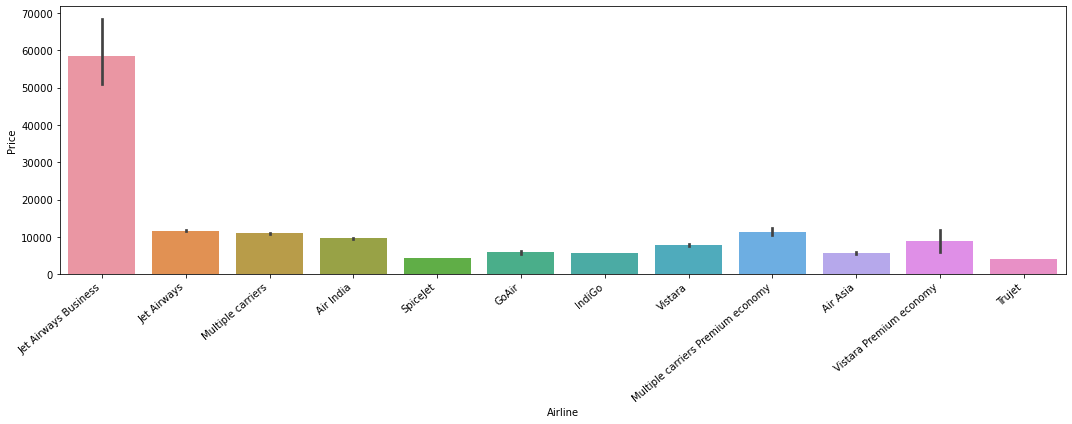

In [40]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

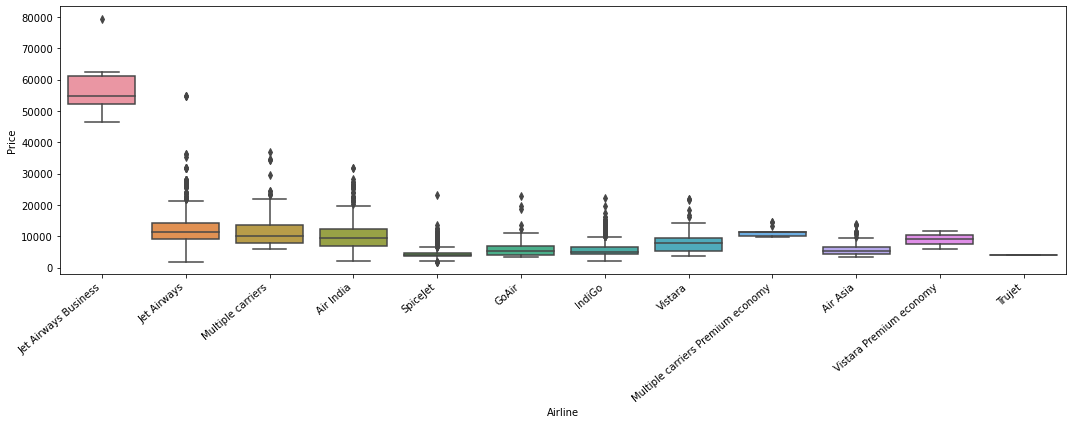

In [42]:
# boxplot of Airline vs Price for statistical analysis
plt.figure(figsize=(15,6))
ax = sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [43]:
#statistical data for the above box plot
data.groupby('Airline').describe()['Price'].sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0


In [44]:
Airline=pd.get_dummies(data['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [46]:
#concatinating the Airline dataframe with the train_data dataframe
data=pd.concat([data,Airline],axis=1)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_time_hr,Dep_time_minute,Arr_time_hr,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#dropping the Airline column
data.drop('Airline',axis=1,inplace=True)
data.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,...,0,1,0,0,0,0,0,0,0,0


## SOURCE AND DESTINATION

In [55]:
list1 = ['Source', 'Destination']
for l in list1:
    print(data[[l]].value_counts(), '\n')

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
dtype: int64 

Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
dtype: int64 



#### We can use OneHotEncoding for Source and Destination columns because there are only 5 and 6 different values respectively


In [56]:
# Using get_dummies method of pandas for OneHotEncoding
data=pd.get_dummies(data=data,columns=['Source','Destination'],drop_first=True)
data.head()

,Route,Duration,Total_Stops,Price,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,day_of_journey,month_of_journey,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,5,1,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,6,9,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,5,12,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,3,1,...,0,0,0,0,0,0,0,0,0,1


## ROUTE

In [61]:
route = data[['Route']]
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [62]:
data['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

#### Here there are maximum 4 stops for a flight and hence the number of routes would be 5 (a -> b -> c -> d -> e -> f)


In [63]:
route['Route_1']=route['Route'].str.split('→').str[0]
route['Route_2']=route['Route'].str.split('→').str[1]
route['Route_3']=route['Route'].str.split('→').str[2]
route['Route_4']=route['Route'].str.split('→').str[3]
route['Route_5']=route['Route'].str.split('→').str[4]

C:\Users\Abin\AppData\Local\Temp\ipykernel_17632\1191680421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_1']=route['Route'].str.split('→').str[0]
C:\Users\Abin\AppData\Local\Temp\ipykernel_17632\1191680421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_2']=route['Route'].str.split('→').str[1]
C:\Users\Abin\AppData\Local\Temp\ipykernel_17632\1191680421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [64]:
route.head()

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [65]:
# fill the NaN values with None
route.fillna('None',inplace=True)
route.head()

C:\Users\Abin\AppData\Local\Temp\ipykernel_17632\379556495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.fillna('None',inplace=True)


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [66]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for i in range(1,6):
    col='Route_'+str(i)
    route[col]=label_encoder.fit_transform(route[col])
    
route.head()

C:\Users\Abin\AppData\Local\Temp\ipykernel_17632\4063273218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col]=label_encoder.fit_transform(route[col])


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


In [67]:
# dropping the Route column
route.drop('Route',inplace=True,axis=1)
route.head()

C:\Users\Abin\AppData\Local\Temp\ipykernel_17632\76603546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.drop('Route',inplace=True,axis=1)


,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,13,29,13,5
1,2,25,1,3,5
2,3,32,4,5,5
3,2,34,3,13,5
4,0,34,8,13,5


In [69]:
# concatinating route and train_data
data=pd.concat([data,route],axis=1)
data.head()

,Route,Duration,Total_Stops,Price,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,day_of_journey,month_of_journey,...,Route_1,Route_2,Route_3,Route_4,Route_5,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,0,13,29,13,5,0,13,29,13,5
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,5,1,...,2,25,1,3,5,2,25,1,3,5
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,6,9,...,3,32,4,5,5,3,32,4,5,5
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,5,12,...,2,34,3,13,5,2,34,3,13,5
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,3,1,...,0,34,8,13,5,0,34,8,13,5


In [70]:
# dropping the route column from train_data
data.drop('Route',inplace=True,axis=1)
data.head(2)

,Duration,Total_Stops,Price,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,day_of_journey,month_of_journey,Air India,...,Route_1,Route_2,Route_3,Route_4,Route_5,Route_1,Route_2,Route_3,Route_4,Route_5
0,170,0,3897,22,20,1,10,24,3,0,...,0,13,29,13,5,0,13,29,13,5
1,445,2,7662,5,50,13,15,5,1,1,...,2,25,1,3,5,2,25,1,3,5
